# Predobdelava dokumenta

Primer predobdelave dokumenta z delitvijo na pojavnice, filtriranjem odvečnih besed in prikazom v oblakov besed.

In [9]:
from textsemantics.server_api import ServerAPI

Naložimo korpus zakonov s strežnika.

In [10]:
api = ServerAPI()
datasets = api.list_datasets()
laws = datasets[0][0]
metadata = api.get_metadata(laws)
metadata.head()

,Title,Uradni list Issue,Date published,Law text,Date passed,Date valid,Institution accepted,Institution prepared
0,5479. Zakon o spremembah in dopolnitvah Zakona...,106/2010,2010-12-27,http://file.biolab.si/text-semantics/laws/5479...,2010-12-16,2011-01-11,Državni zbor RS,Ministrstvo za notranje zadeve
1,1679. Zakon o spremembah in dopolnitvah Zakona...,39/2006,2006-04-13,http://file.biolab.si/text-semantics/laws/1679...,2006-03-30,2006-04-28,Državni zbor RS,Ministrstvo za notranje zadeve
2,2936. Zakon o spremembah in dopolnitvah Zakona...,67/2019,2019-11-08,http://file.biolab.si/text-semantics/laws/2936...,2019-10-29,2019-11-23,Državni zbor RS,Ministrstvo za finance
3,3886. Zakon o spremembah in dopolnitvah Zakona...,91/2005,2005-10-14,http://file.biolab.si/text-semantics/laws/3886...,2005-09-29,2005-10-29,Državni zbor RS,Ministrstvo za pravosodje
4,625. Zakon o spremembah in dopolnitvah Zakona ...,17/2015,2015-03-13,http://file.biolab.si/text-semantics/laws/625-...,2015-03-04,2015-03-28,Državni zbor RS,Ministrstvo za pravosodje


Nato izberemo prvi dokument v korpusu. Prikažemo prvih 1000 znakov.

In [11]:
doc = api.get_text(metadata["Law text"][0])
doc = " ".join(doc.split())
print(doc[:1000])

Na podlagi druge alinee prvega odstavka 107. člena in prvega odstavka 91. člena Ustave Republike Slovenije izdajam Razglašam Zakon o spremembah in dopolnitvah Zakona o matičnem registru (ZMatR-B), ki ga je sprejel Državni zbor Republike Slovenije na 23. seji 16. decembra 2010. 1. člen V Zakonu o matičnem registru (Uradni list RS, št. 59/06 – uradno prečiščeno besedilo) se v 5. členu črta tretji odstavek. 2. člen Za 14. členom se doda nov 14.a člen, ki se glasi: »14.a člen Posebna ureditev vpisa smrti v matični register Smrt oseb, ki so življenje izgubile neposredno po koncu druge svetovne vojne ali med njo, in ni bila vpisana v matično knjigo umrlih oziroma v matični register, se vpiše v matični register na podlagi pravnomočne odločbe, s katero se ugotovi smrt v skladu z določbami tega člena. Predlog za uvedbo postopka se vloži pri pristojnem organu, na območju katerega je kraj, kjer je imela umrla oseba zadnje stalno prebivališče, če tega ni mogoče ugotoviti, pa pri pristojnem organu,

Naložimo potrebne knjižnice za predprocesiranje besedil. S knjižnico `nltk` oblikujemo pojavnice (tokens), z `lemmagen` pa slovenske besede pretvorimo v njihovo osnovno obliko (npr. dokumentov --> dokument).

In [12]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from lemmagen.lemmatizer import Lemmatizer
from lemmagen import DICTIONARY_SLOVENE

Definiramo postopek predobdelave, kjer bomo iz besedila izluščili besede (brez ločil), jih spremenili v male črke, odstranili nepomenske besede in preostale pojavnice pretvorili v njihovo izvorno obliko.

In [13]:
def preprocess(doc):
    stop_words = set(stopwords.words('slovene'))
    tokenizer = RegexpTokenizer("\w+")
    lemmatizer = Lemmatizer(dictionary=DICTIONARY_SLOVENE)
    tokens = tokenizer.tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens 
              if token not in stop_words 
              and len(token) > 2 
              and not token.isnumeric()]
    return tokens

Rezultati predobdelave dokumenta.

In [14]:
tokens = preprocess(doc)
print(f"Število znakov v dokumentu: {len(doc)}")
print(f"Število besed: {len(tokens)}")
print(f"Število unikatnih besed: {len(set(tokens))}")

Število znakov v dokumentu: 3611
Število besed: 341
Število unikatnih besed: 142


Poiščemo najpogostejših 10 besed v dokumentu.

In [15]:
dist = nltk.FreqDist(tokens)
common = dist.most_common(10)
print("Najpogostejših 10 besed v dokumentu:")
for word, count in common: print(f"    {word}: {count}")

Najpogostejših 10 besed v dokumentu:
    člen: 27
    odstavek: 18
    smrt: 16
    oseba: 12
    matičen: 11
    register: 9
    vpisati: 7
    pristojen: 6
    organ: 6
    zakon: 5


Za konec najpogostejše besede prikažemo v oblaku besed, kjer velikost črk ustreza frekvenci besede.

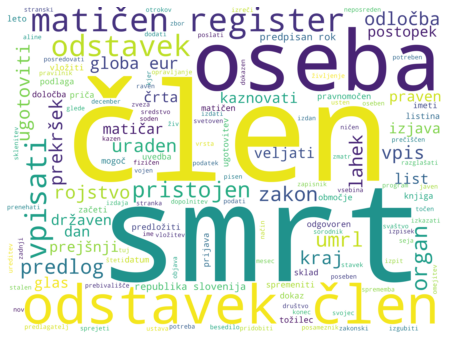

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=4000, height=3000, random_state=0, background_color="white"
).generate(" ".join(tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");